# **Investigating the relationship between the intensity and polarization of light via sinuosoidally varying voltages.**

For this experiment, we will be considering **voltage_a as the voltage measured at photodiode A** in Volts and **voltage_b as the voltage measured at photodiode B** in Volts.

hwp_angles represents the angle of the half wave plate in degrees. The angle is measured with respect to the angle of the polarizer which has been set nominally at 0 degrees for the rest of this experiment.

**Photodiode A** will be measuring the voltage corresponding to the **horizontal component** of our wave.

**Photodiode B** will be measuring the voltage corresponding to the **vertical component** of our wave.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.alpha'] = 0.2

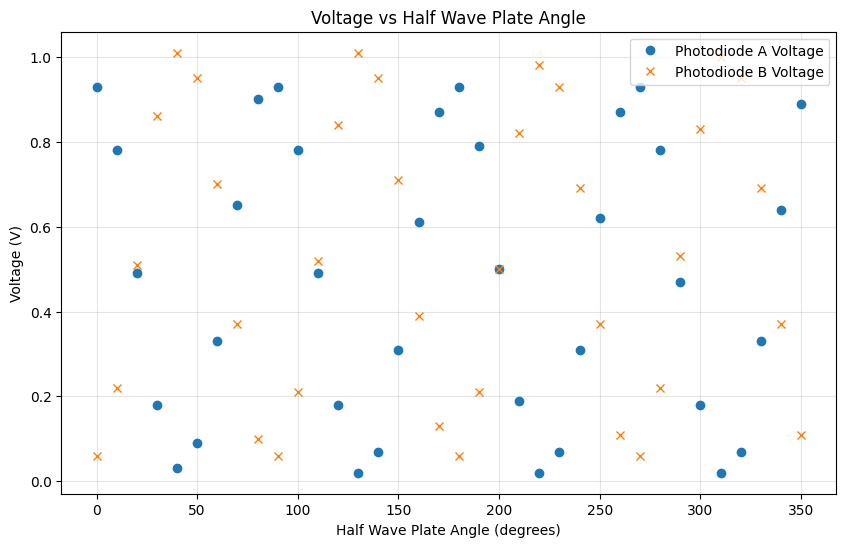

In [2]:
hwp_angles = np.array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350.])

voltage_a =  np.array([0.93, 0.78, 0.49, 0.18, 0.03, 0.09, 0.33, 0.65, 0.9 , 0.93, 0.78,
        0.49, 0.18, 0.02, 0.07, 0.31, 0.61, 0.87, 0.93, 0.79, 0.5 , 0.19,
        0.02, 0.07, 0.31, 0.62, 0.87, 0.93, 0.78, 0.47, 0.18, 0.02, 0.07,
        0.33, 0.64, 0.89])

voltage_b =  np.array([0.06, 0.22, 0.51, 0.86, 1.01, 0.95, 0.7 , 0.37, 0.1 , 0.06, 0.21,
        0.52, 0.84, 1.01, 0.95, 0.71, 0.39, 0.13, 0.06, 0.21, 0.5 , 0.82,
        0.98, 0.93, 0.69, 0.37, 0.11, 0.06, 0.22, 0.53, 0.83, 1.  , 0.95,
        0.69, 0.37, 0.11])

plt.figure(figsize=(10, 6))
plt.plot(hwp_angles, voltage_a, 'o', label='Photodiode A Voltage')
plt.plot(hwp_angles, voltage_b, 'x',label='Photodiode B Voltage')

plt.title('Voltage vs Half Wave Plate Angle')
plt.xlabel('Half Wave Plate Angle (degrees)')
plt.ylabel('Voltage (V)')
plt.legend()

plt.show()

It appears that there is a **sinuosidal relationship** between the Half-Wave Plate Angle (degrees) and the corresponding voltage measured at Photodiode A (V).

Note that the amplitude of the voltage is always +ve. This indicates that we are not dealing with a traditional sinuosoidal function and therefore, it would be unwise to project our function using numpy's in-built fast fourier transform methods.

Our guess according to Jones formalism is that the voltage at the photodiode should behave as **Acos^2 (theta) or Asin^2 (theta) depending on the polarization of the light**.

We will now identify the relationship between the voltage measured at Photodiode A (V) and the angle of the Half Wave Plate (degrees).

**We begin by plotting a scatter plot with the original data and then fitting a sine^2 function to the dataset.**

Let's see what kind of results we get from this intuition.

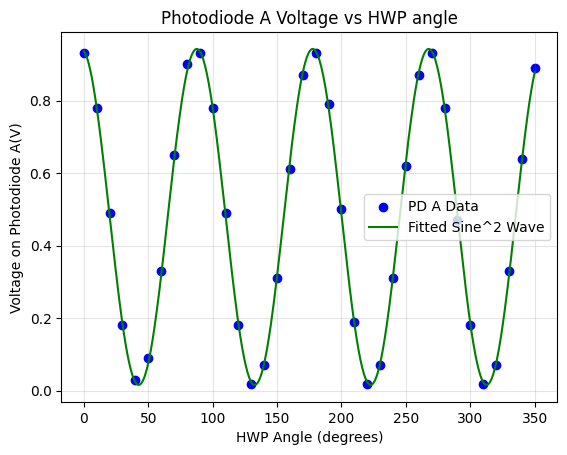

In [3]:
def sine_squared(x, a, b, c, d):
    return a * np.sin(b * x + c)**2 + d

param2, param_cov2 = curve_fit(sine_squared, hwp_angles, voltage_a, p0=[np.max(voltage_a), 5, 0, np.min(voltage_a)])

fitted_sin_squared = sine_squared(hwp_angles, *param2)

X_Y_Spline_squared = make_interp_spline(hwp_angles, fitted_sin_squared)
X_squared = np.linspace(hwp_angles.min(), hwp_angles.max(), 500)
Y_squared = X_Y_Spline_squared(X_squared)

plt.scatter(hwp_angles, voltage_a, label='PD A Data', color='blue')
plt.plot(X_squared, Y_squared, label='Fitted Sine^2 Wave', color='green')
plt.legend()
plt.xlabel('HWP Angle (degrees)')
plt.ylabel('Voltage on Photodiode A(V)')
plt.title('Photodiode A Voltage vs HWP angle')
plt.show()


We will now identify the relationship between the voltage measured at Photodiode B (V) and the angle of the Half Wave Plate (degrees).

**We begin by plotting a scatter plot with the original data and then fitting a cosine^2 function to the dataset.**

Let's see what kind of results we get from this intuition.

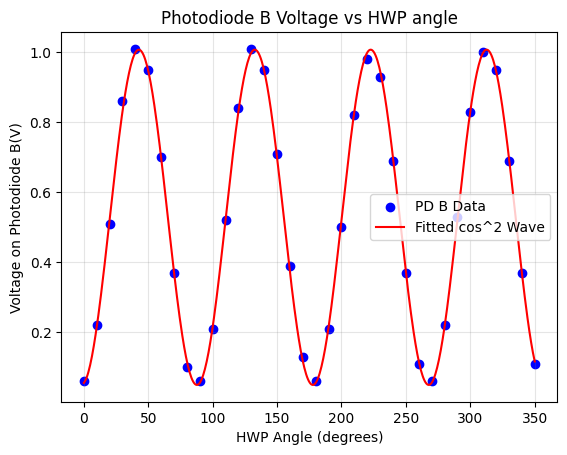

In [4]:
def cos_squared(x, a, b, c, d):
    return a * np.cos(b * x + c)**2 + d

param2, param_cov2 = curve_fit(cos_squared, hwp_angles, voltage_b, p0=[np.max(voltage_b), 5, 0, np.min(voltage_b)])

fitted_cos_squared = cos_squared(hwp_angles, *param2)

X_Y_Spline_squared = make_interp_spline(hwp_angles, fitted_cos_squared)
X2_squared = np.linspace(hwp_angles.min(), hwp_angles.max(), 500)
Y2_squared = X_Y_Spline_squared(X2_squared)

plt.scatter(hwp_angles, voltage_b, label='PD B Data', color='blue')
plt.plot(X2_squared, Y2_squared, label='Fitted cos^2 Wave', color='red')
plt.legend()
plt.xlabel('HWP Angle (degrees)')
plt.ylabel('Voltage on Photodiode B(V)')
plt.title('Photodiode B Voltage vs HWP angle')
plt.show()

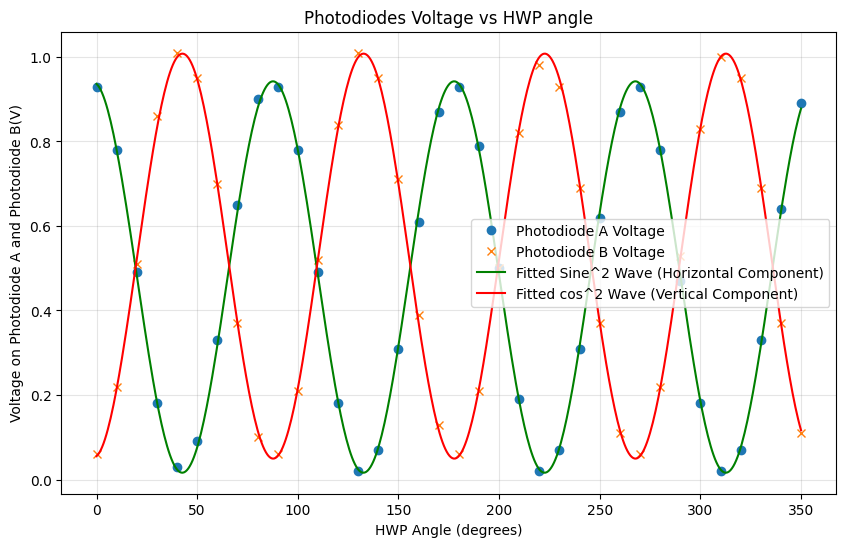

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(hwp_angles, voltage_a, 'o', label='Photodiode A Voltage')
plt.plot(hwp_angles, voltage_b, 'x',label='Photodiode B Voltage')
plt.plot(X_squared, Y_squared, label='Fitted Sine^2 Wave (Horizontal Component)', color='green')
plt.plot(X2_squared, Y2_squared, label='Fitted cos^2 Wave (Vertical Component)', color='red')
plt.legend()
plt.xlabel('HWP Angle (degrees)')
plt.ylabel('Voltage on Photodiode A and Photodiode B(V)')
plt.title('Photodiodes Voltage vs HWP angle')
plt.show()

The results confirm our theoretical evaluations. **As the half wave plate is rotated, the polarization of the light changes in a manner such that the vertical and horizontal components of the wave vary sinuosoidally in intensity.**

*Note: Though we have plotted Voltage against HWP angle in our figures, Voltage and Intensity of linearly polarized light have a proportional relationship in our formalism and that allows us to draw a general conclusion in this case.*

**We will now be changing the experimental setup slightly by keeping the half wave plate angle fixed while varying the polarizer angle in increments of 10 degrees. This should reverse the orthogonal components of our photodiodes while performing our experiments.**

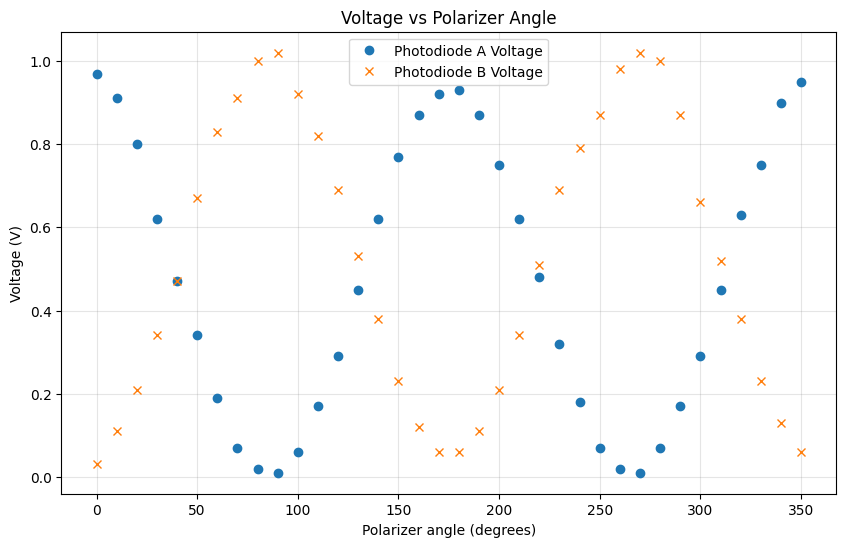

In [6]:
polarizer_angle = np.array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350.])

v_a = np.array([0.97, 0.91, 0.8 , 0.62, 0.47, 0.34, 0.19, 0.07, 0.02, 0.01, 0.06,
 0.17, 0.29, 0.45, 0.62, 0.77, 0.87, 0.92, 0.93, 0.87, 0.75, 0.62,
 0.48, 0.32, 0.18, 0.07, 0.02, 0.01, 0.07, 0.17, 0.29, 0.45, 0.63,
 0.75, 0.9 , 0.95])

v_b = np.array([0.03, 0.11, 0.21, 0.34, 0.47, 0.67, 0.83, 0.91, 1.  , 1.02, 0.92,
 0.82, 0.69, 0.53, 0.38, 0.23, 0.12, 0.06, 0.06, 0.11, 0.21, 0.34,
 0.51, 0.69, 0.79, 0.87, 0.98, 1.02, 1.  , 0.87, 0.66, 0.52, 0.38,
 0.23, 0.13, 0.06])

plt.figure(figsize=(10, 6))
plt.plot(polarizer_angle, v_a, 'o', label='Photodiode A Voltage')
plt.plot(polarizer_angle, v_b, 'x',label='Photodiode B Voltage')

plt.title('Voltage vs Polarizer Angle')
plt.xlabel('Polarizer angle (degrees)')
plt.ylabel('Voltage (V)')
plt.legend()

plt.show()

We now fit a sin^2 function to the vertical component.

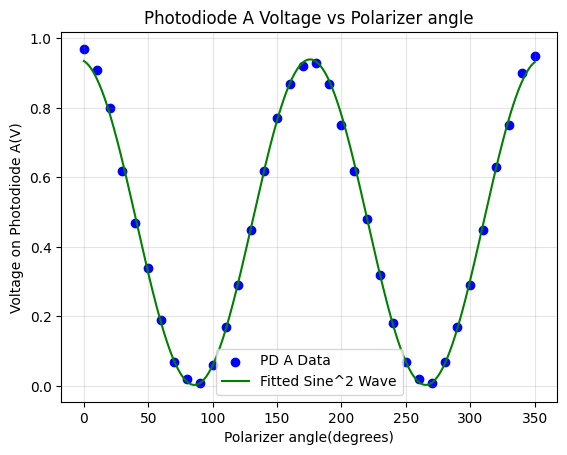

In [7]:
def sine_squared(x, a, b, c, d):
    return a * np.sin(b * x + c)**2 + d

param2, param_cov2 = curve_fit(sine_squared, polarizer_angle, v_a, p0=[np.max(v_a), 5, 0, np.min(v_a)])

fitted_sin_squared = sine_squared(polarizer_angle, *param2)

X_Y_Spline_squared = make_interp_spline(polarizer_angle, fitted_sin_squared)
X_squared = np.linspace(polarizer_angle.min(), polarizer_angle.max(), 500)
Y_squared = X_Y_Spline_squared(X_squared)

plt.scatter(polarizer_angle, v_a, label='PD A Data', color='blue')
plt.plot(X_squared, Y_squared, label='Fitted Sine^2 Wave', color='green')
plt.legend()
plt.xlabel('Polarizer angle(degrees)')
plt.ylabel('Voltage on Photodiode A(V)')
plt.title('Photodiode A Voltage vs Polarizer angle')
plt.show()


We now fit a cos^2 function to our horizontal component.

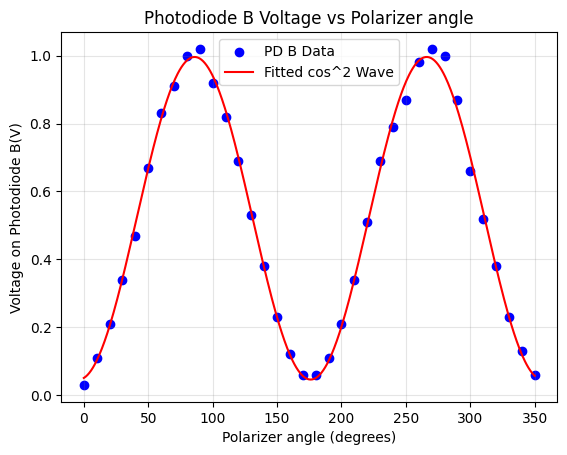

In [8]:
def cos_squared(x, a, b, c, d):
    return a * np.cos(b * x + c)**2 + d

param2, param_cov2 = curve_fit(cos_squared, polarizer_angle, v_b, p0=[np.max(v_b), 5, 0, np.min(v_b)])

fitted_cos_squared = cos_squared(polarizer_angle, *param2)

X_Y_Spline_squared = make_interp_spline(polarizer_angle, fitted_cos_squared)
X2_squared = np.linspace(polarizer_angle.min(), polarizer_angle.max(), 500)
Y2_squared = X_Y_Spline_squared(X2_squared)

plt.scatter(polarizer_angle, v_b, label='PD B Data', color='blue')
plt.plot(X2_squared, Y2_squared, label='Fitted cos^2 Wave', color='red')
plt.legend()
plt.xlabel('Polarizer angle (degrees)')
plt.ylabel('Voltage on Photodiode B(V)')
plt.title('Photodiode B Voltage vs Polarizer angle')
plt.show()

Let's plot both on the same figure!

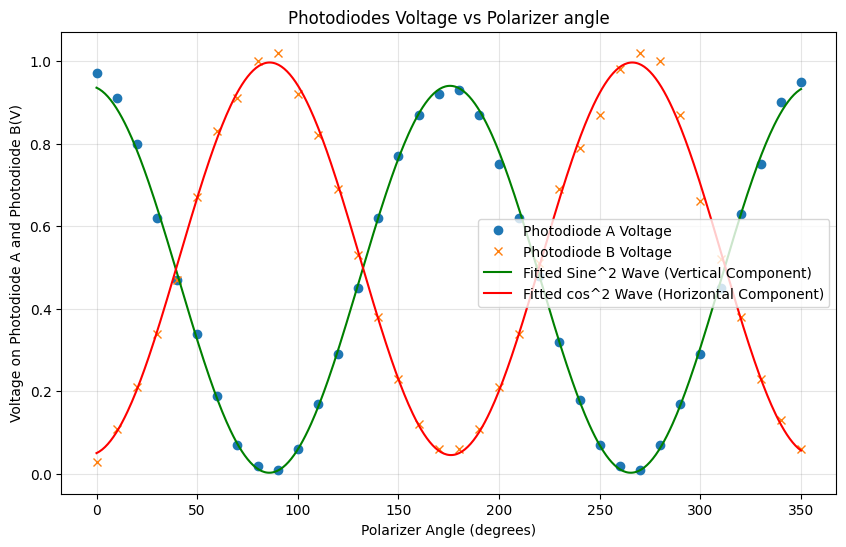

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(polarizer_angle, v_a, 'o', label='Photodiode A Voltage')
plt.plot(polarizer_angle, v_b, 'x',label='Photodiode B Voltage')
plt.plot(X_squared, Y_squared, label='Fitted Sine^2 Wave (Vertical Component)', color='green')
plt.plot(X2_squared, Y2_squared, label='Fitted cos^2 Wave (Horizontal Component)', color='red')
plt.legend()
plt.xlabel('Polarizer Angle (degrees)')
plt.ylabel('Voltage on Photodiode A and Photodiode B(V)')
plt.title('Photodiodes Voltage vs Polarizer angle')
plt.show()

Splendid! The sinosoidal variation of the orthogonal components of our source seem intact.

This concludes our experiment. Future work would involve more rigorous analysis of the polarization angle of light using different phase retarders and polarizers!